In [12]:
# import 
 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures



In [13]:
import matplotlib as mpl

mpl.rcParams['font.family'] = 'AppleGothic'

mpl.rcParams['axes.unicode_minus'] = False

In [14]:
# 2. Load
df = pd.read_csv('./data/student-mat.csv',sep=";")

df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [15]:
# 결측치 확인
df_null = df.isnull().sum()
print("컬럼별 결측치 개수:\n", df_null)

컬럼별 결측치 개수:
 school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


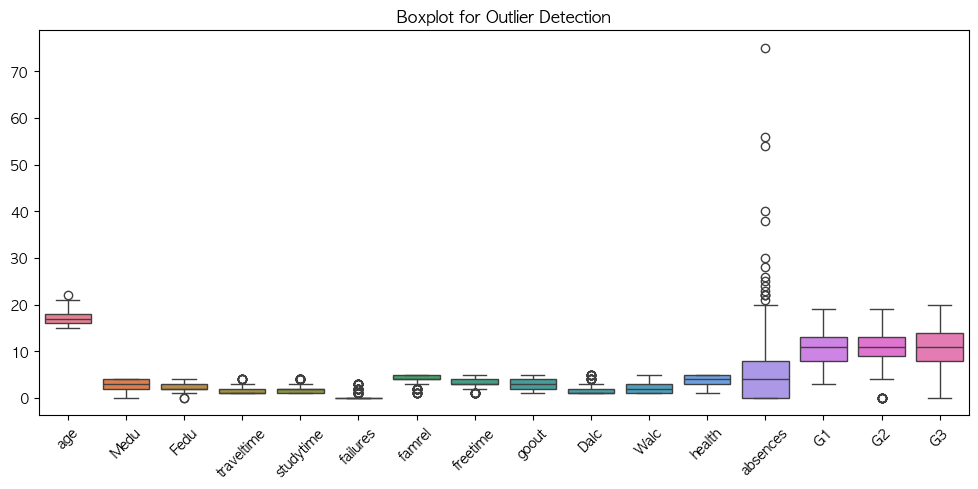

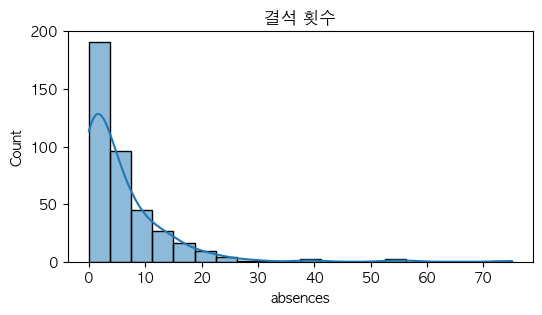

In [ ]:
# 수치형 컬럼만 선택
num_cols = df.select_dtypes(include=['int64','float64']).columns

# 박스플롯으로 이상치 확인
plt.figure(figsize=(12,5))
sns.boxplot(data=df[num_cols])
plt.xticks(rotation=45)
plt.title("Boxplot for Outlier Detection")
plt.show()

plt.figure(figsize=(6,3))
sns.histplot(df['absences'], bins=20, kde=True)
plt.title("결석 횟수")
plt.show()


In [17]:
absences = df ['absences']

print(absences.describe())

count    395.000000
mean       5.708861
std        8.003096
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max       75.000000
Name: absences, dtype: float64


In [18]:
G3 = df['G3']

print(G3.describe())
G3

count    395.000000
mean      10.415190
std        4.581443
min        0.000000
25%        8.000000
50%       11.000000
75%       14.000000
max       20.000000
Name: G3, dtype: float64


0       6
1       6
2      10
3      15
4      10
       ..
390     9
391    16
392     7
393    10
394     9
Name: G3, Length: 395, dtype: int64

### 01_성적과 결석의 관계성

features= [
    "G1", "G2", "studytime", "absences", 
    "freetime", "goout", "Dalc", "Walc", "health",
    "Medu", "Fedu", "famsup"
]
target = "G3"

In [19]:
features_1 = ["studytime", "absences", "G1", "G2"]
target = "G3"

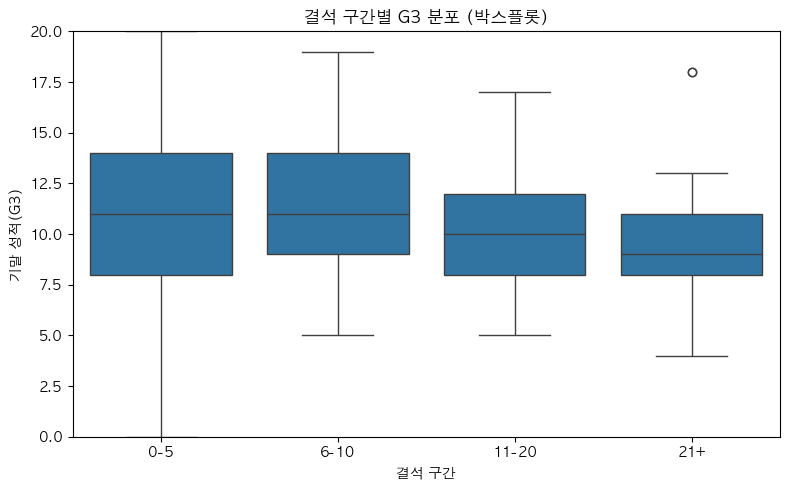

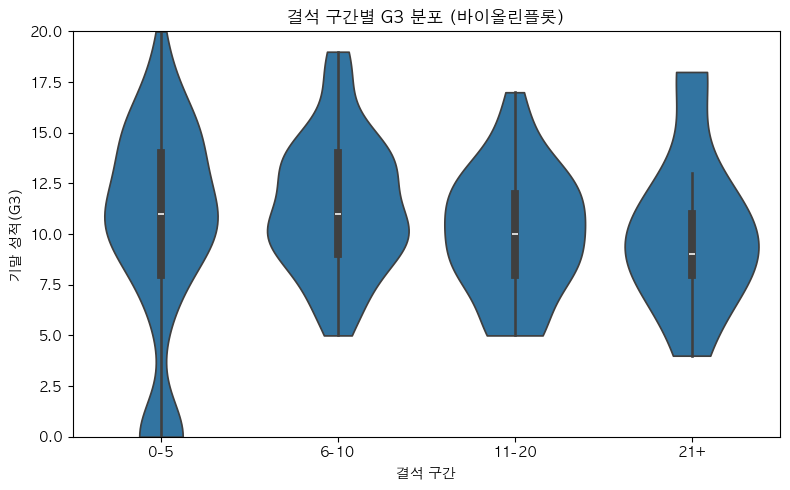

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


tmp = df.copy()
bins = [-1, 5, 10, 20, tmp["absences"].max()]
labels = ["0-5", "6-10", "11-20", "21+"]
tmp["abs_band"] = pd.cut(tmp["absences"], bins=bins, labels=labels, include_lowest=True)

#  박스플롯
plt.figure(figsize=(8,5))
sns.boxplot(x="abs_band", y="G3", data=tmp, order=labels)
plt.xlabel("결석 구간")
plt.ylabel("기말 성적(G3)")
plt.title("결석 구간별 G3 분포 (박스플롯)")
plt.ylim(0, 20)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,5))
sns.violinplot(x="abs_band", y="G3", data=tmp, order=labels, inner="box", cut=0)
plt.xlabel("결석 구간")
plt.ylabel("기말 성적(G3)")
plt.title("결석 구간별 G3 분포 (바이올린플롯)")
plt.ylim(0, 20)
plt.tight_layout()
plt.show()


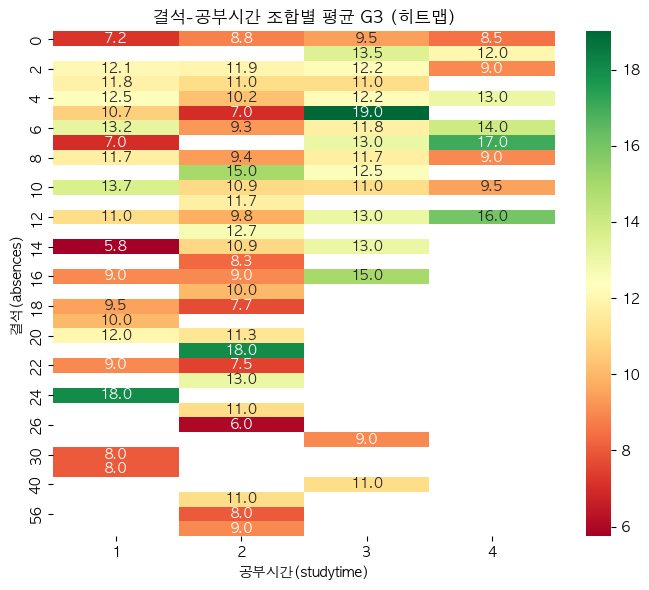

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# studytime이 1~4 범주형이므로 피벗에 적합
pivot_data = df.pivot_table(
    values="G3", index="absences", columns="studytime", aggfunc="mean"
)

plt.figure(figsize=(7,6))
sns.heatmap(pivot_data, cmap="RdYlGn", annot=True, fmt=".1f")
plt.title("결석-공부시간 조합별 평균 G3 (히트맵)")
plt.xlabel("공부시간(studytime)")
plt.ylabel("결석(absences)")
plt.tight_layout()
plt.show()


두 변수의 상호작용 효과 확인 가능

결석이 적을수록 점수가 높고, 공부시간이 늘수록 더 높아지는 조합 효과를 색상으로 한눈에 볼 수 있음.

예: 결석 ↓ + 공부시간 ↑ 구간이 가장 진한 녹색 → 성적이 가장 높은 조합

최적 조건 도출 가능

예: 공부시간 3단계, 결석 0~5회 → G3 평균 15점 이상

이런 식으로 정책 제안용 근거로 쓸 수 있음.

리스크 구간도 바로 보임

예: 결석 20회↑ + 공부시간 1단계 → 평균 7점 이하

학습 개입 필요 학생군을 식별할 수 있음.

“이 히트맵을 보면 공부시간을 늘려도 결석이 많으면 효과가 제한적이라는 걸 알 수 있다.”

“반대로 결석이 적다면 공부시간 증가 효과가 더 크게 나타난다.”

→ 즉, 결석 관리가 우선, 그다음이 공부시간 확보라는 전략적 메시지를 줄 수 있음.